# 1. Pandas

- 정의 : 데이터 가공 및 분석을 위해 만들어진 Python 라이브러리
- Pandas라는 이름은 "Panel data"에서 유래함(개량경제학 용어로써 다차원의 구조화된 데이터셋을 다룸)
> balanced panel
![balanced panel](https://wikimedia.org/api/rest_v1/media/math/render/svg/de4ab9449dffb05244e681551e6f3ce710856ac6)
unbalanced panel
![unbalanced panel](https://wikimedia.org/api/rest_v1/media/math/render/svg/fad5580f0bc2deadc1a110b647dded40867600c0)

## 1.1 10 Minute to pandas (http://pandas.pydata.org/pandas-docs/stable/10min.html)
 - Object 생성([Object Creation](http://pandas.pydata.org/pandas-docs/stable/10min.html#object-creation))
 - 데이터 조회([Viewing Data](http://pandas.pydata.org/pandas-docs/stable/10min.html#viewing-data))
 - 데이터 선택([Selection](http://pandas.pydata.org/pandas-docs/stable/10min.html#selection))
     - Selection by Label
     - Selection by Position
     - Boolean Indexing
     - Setting
 - 누락 데이터([Missing Data](http://pandas.pydata.org/pandas-docs/stable/10min.html#missing-data))
 - Pandas 계산([Operations](http://pandas.pydata.org/pandas-docs/stable/10min.html#operations))
     - Stats
     - Apply
     - Histogramming
     - String Methods
 - 병합([Merge](http://pandas.pydata.org/pandas-docs/stable/10min.html#merge))
     - Concat
     - Join
     - Append
 - 그룹화([Grouping](http://pandas.pydata.org/pandas-docs/stable/10min.html#grouping))
 - 변형([Reshaping](http://pandas.pydata.org/pandas-docs/stable/10min.html#reshaping))
     - Stack
     - Pivot Tables
 - 시계열([Time Series](http://pandas.pydata.org/pandas-docs/stable/10min.html#time-series))
 - 분류([Categoricals](http://pandas.pydata.org/pandas-docs/stable/10min.html#categoricals))
 - 그래프([Plotting](http://pandas.pydata.org/pandas-docs/stable/10min.html#plotting))
 - 데이터 입출력([Getting Data in/out](http://pandas.pydata.org/pandas-docs/stable/10min.html#getting-data-in-out))
 - [Gotchas](http://pandas.pydata.org/pandas-docs/stable/10min.html#gotchas)

### 1.1.1 Object 생성

In [1]:
import pandas as pd
import numpy as np
s = pd.Series([1,3,5,np.nan,6,8])
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

### 1.1.2 데이터 조회

#### 1.1.2.1 처음과 끝 조회

In [2]:
df.head()

,A,B,C,D
2013-01-01,-0.653940,-1.157310,-0.211337,-0.180736
2013-01-02,-0.371667,1.622355,1.058329,0.482739
2013-01-03,2.570225,-0.354195,-0.136308,2.269301
2013-01-04,0.323254,-1.012833,-0.073677,0.320976
2013-01-05,1.308554,-1.058535,-2.045659,-0.746443


In [3]:
df.tail(3)

,A,B,C,D
2013-01-04,0.323254,-1.012833,-0.073677,0.320976
2013-01-05,1.308554,-1.058535,-2.045659,-0.746443
2013-01-06,0.632386,2.071605,0.096008,0.668358


#### 1.1.2.2 인덱스, 컬럼, 값 조회

In [4]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [6]:
df.values

array([[-0.65393978, -1.1573103 , -0.21133657, -0.18073593],
       [-0.37166657,  1.62235525,  1.0583288 ,  0.48273929],
       [ 2.5702251 , -0.35419548, -0.13630752,  2.26930085],
       [ 0.32325367, -1.01283313, -0.07367668,  0.32097586],
       [ 1.30855411, -1.05853535, -2.04565906, -0.74644337],
       [ 0.6323863 ,  2.07160514,  0.09600751,  0.6683584 ]])

#### 1.1.2.3 통계 데이터, 변환, 정렬

In [7]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.634802,0.018514,-0.218774,0.469033
std,1.180738,1.451391,1.009505,1.020038
min,-0.653940,-1.157310,-2.045659,-0.746443
25%,-0.197937,-1.047110,-0.192579,-0.055308
50%,0.477820,-0.683514,-0.104992,0.401858
75%,1.139512,1.128218,0.053586,0.621954
max,2.570225,2.071605,1.058329,2.269301


In [8]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.653940,-0.371667,2.570225,0.323254,1.308554,0.632386
B,-1.157310,1.622355,-0.354195,-1.012833,-1.058535,2.071605
C,-0.211337,1.058329,-0.136308,-0.073677,-2.045659,0.096008
D,-0.180736,0.482739,2.269301,0.320976,-0.746443,0.668358


In [9]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.180736,-0.211337,-1.157310,-0.653940
2013-01-02,0.482739,1.058329,1.622355,-0.371667
2013-01-03,2.269301,-0.136308,-0.354195,2.570225
2013-01-04,0.320976,-0.073677,-1.012833,0.323254
2013-01-05,-0.746443,-2.045659,-1.058535,1.308554
2013-01-06,0.668358,0.096008,2.071605,0.632386


In [10]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-0.653940,-1.157310,-0.211337,-0.180736
2013-01-05,1.308554,-1.058535,-2.045659,-0.746443
2013-01-04,0.323254,-1.012833,-0.073677,0.320976
2013-01-03,2.570225,-0.354195,-0.136308,2.269301
2013-01-02,-0.371667,1.622355,1.058329,0.482739
2013-01-06,0.632386,2.071605,0.096008,0.668358


### 1.1.3 선택
#### 1.1.3.1 List 표현

In [11]:
df['A']

2013-01-01   -0.653940
2013-01-02   -0.371667
2013-01-03    2.570225
2013-01-04    0.323254
2013-01-05    1.308554
2013-01-06    0.632386
Freq: D, Name: A, dtype: float64

In [12]:
df[0:3]

,A,B,C,D
2013-01-01,-0.653940,-1.157310,-0.211337,-0.180736
2013-01-02,-0.371667,1.622355,1.058329,0.482739
2013-01-03,2.570225,-0.354195,-0.136308,2.269301


In [13]:
df['2013-01-02':'2013-01-03']

,A,B,C,D
2013-01-02,-0.371667,1.622355,1.058329,0.482739
2013-01-03,2.570225,-0.354195,-0.136308,2.269301


#### 1.1.3.2 Label 을 이용한 표현

In [14]:
df.loc[dates[0]]

A   -0.653940
B   -1.157310
C   -0.211337
D   -0.180736
Name: 2013-01-01 00:00:00, dtype: float64

In [15]:
df.loc['2013-01-02']

A   -0.371667
B    1.622355
C    1.058329
D    0.482739
Name: 2013-01-02 00:00:00, dtype: float64

In [16]:
df.loc[:,['A', 'B']]

,A,B
2013-01-01,-0.653940,-1.157310
2013-01-02,-0.371667,1.622355
2013-01-03,2.570225,-0.354195
2013-01-04,0.323254,-1.012833
2013-01-05,1.308554,-1.058535
2013-01-06,0.632386,2.071605


In [17]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.371667,1.622355
2013-01-03,2.570225,-0.354195
2013-01-04,0.323254,-1.012833


In [18]:
df.loc['20130102',['A','B']]

A   -0.371667
B    1.622355
Name: 2013-01-02 00:00:00, dtype: float64

In [19]:
df.loc[dates[0],'A']

-0.65393977621389299

아래가 좀더 빠르다

In [20]:
df.at[dates[0],'A']

-0.65393977621389299

#### 1.1.3.3 위치를 이용한 표현

In [21]:
df.iloc[3]

A    0.323254
B   -1.012833
C   -0.073677
D    0.320976
Name: 2013-01-04 00:00:00, dtype: float64

In [22]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.323254,-1.012833
2013-01-05,1.308554,-1.058535


In [23]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.371667,1.058329
2013-01-03,2.570225,-0.136308
2013-01-05,1.308554,-2.045659


In [24]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.371667,1.622355,1.058329,0.482739
2013-01-03,2.570225,-0.354195,-0.136308,2.269301


In [25]:
 df.iloc[:,1:3]

,B,C
2013-01-01,-1.157310,-0.211337
2013-01-02,1.622355,1.058329
2013-01-03,-0.354195,-0.136308
2013-01-04,-1.012833,-0.073677
2013-01-05,-1.058535,-2.045659
2013-01-06,2.071605,0.096008


In [26]:
df.iloc[1,1]

1.6223552454039052

아래가 더 빠르다

In [27]:
df.iat[1,1]

1.6223552454039052

#### 1.1.3.4 조건식을 이용

In [28]:
df[df.A>0]

,A,B,C,D
2013-01-03,2.570225,-0.354195,-0.136308,2.269301
2013-01-04,0.323254,-1.012833,-0.073677,0.320976
2013-01-05,1.308554,-1.058535,-2.045659,-0.746443
2013-01-06,0.632386,2.071605,0.096008,0.668358


In [29]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,1.622355,1.058329,0.482739
2013-01-03,2.570225,NaN,NaN,2.269301
2013-01-04,0.323254,NaN,NaN,0.320976
2013-01-05,1.308554,NaN,NaN,NaN
2013-01-06,0.632386,2.071605,0.096008,0.668358


In [30]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

In [31]:
df2

,A,B,C,D,E
2013-01-01,-0.653940,-1.157310,-0.211337,-0.180736,one
2013-01-02,-0.371667,1.622355,1.058329,0.482739,one
2013-01-03,2.570225,-0.354195,-0.136308,2.269301,two
2013-01-04,0.323254,-1.012833,-0.073677,0.320976,three
2013-01-05,1.308554,-1.058535,-2.045659,-0.746443,four
2013-01-06,0.632386,2.071605,0.096008,0.668358,three


In [32]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,2.570225,-0.354195,-0.136308,2.269301,two
2013-01-05,1.308554,-1.058535,-2.045659,-0.746443,four


#### 1.1.3.5 Setting

In [33]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [34]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [35]:
df['F'] = s1

In [36]:
df.at[dates[0], 'A'] = 0

In [37]:
df.iat[0,1] = 0

In [38]:
df.loc[:,'D'] = np.array([5]* len(df))

In [39]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.211337,5,NaN
2013-01-02,-0.371667,1.622355,1.058329,5,1.0
2013-01-03,2.570225,-0.354195,-0.136308,5,2.0
2013-01-04,0.323254,-1.012833,-0.073677,5,3.0
2013-01-05,1.308554,-1.058535,-2.045659,5,4.0
2013-01-06,0.632386,2.071605,0.096008,5,5.0


In [40]:
df2 = df.copy()
df2[df2>0] = -df2

In [41]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.211337,-5,NaN
2013-01-02,-0.371667,-1.622355,-1.058329,-5,-1.0
2013-01-03,-2.570225,-0.354195,-0.136308,-5,-2.0
2013-01-04,-0.323254,-1.012833,-0.073677,-5,-3.0
2013-01-05,-1.308554,-1.058535,-2.045659,-5,-4.0
2013-01-06,-0.632386,-2.071605,-0.096008,-5,-5.0


### 1.1.4 누락 데이터

In [42]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+ ['E'])

In [43]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.211337,5,NaN,NaN
2013-01-02,-0.371667,1.622355,1.058329,5,1.0,NaN
2013-01-03,2.570225,-0.354195,-0.136308,5,2.0,NaN
2013-01-04,0.323254,-1.012833,-0.073677,5,3.0,NaN


In [44]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [45]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.211337,5,NaN,1.0
2013-01-02,-0.371667,1.622355,1.058329,5,1.0,1.0
2013-01-03,2.570225,-0.354195,-0.136308,5,2.0,NaN
2013-01-04,0.323254,-1.012833,-0.073677,5,3.0,NaN


In [46]:
# NaN 항목 지우기
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.371667,1.622355,1.058329,5,1.0,1.0


In [47]:
#채우기
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.211337,5,5.0,1.0
2013-01-02,-0.371667,1.622355,1.058329,5,1.0,1.0
2013-01-03,2.570225,-0.354195,-0.136308,5,2.0,5.0
2013-01-04,0.323254,-1.012833,-0.073677,5,3.0,5.0


In [48]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### 1.1.5 연산자
#### 1.1.5.1 통계

In [49]:
#컬럼별 평균
df.mean()

A    0.743792
B    0.211399
C   -0.218774
D    5.000000
F    3.000000
dtype: float64

In [50]:
#Index 별 평균
df.mean(1)

2013-01-01    1.197166
2013-01-02    1.661803
2013-01-03    1.815944
2013-01-04    1.447349
2013-01-05    1.440872
2013-01-06    2.560000
Freq: D, dtype: float64

In [51]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [52]:
pd.Series([1,3,5,np.nan,6,8], index=dates)

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [53]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,1.570225,-1.354195,-1.136308,4.0,1.0
2013-01-04,-2.676746,-4.012833,-3.073677,2.0,0.0
2013-01-05,-3.691446,-6.058535,-7.045659,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [54]:
df.sub(s, axis='index').dropna()

,A,B,C,D,F
2013-01-03,1.570225,-1.354195,-1.136308,4.0,1.0
2013-01-04,-2.676746,-4.012833,-3.073677,2.0,0.0
2013-01-05,-3.691446,-6.058535,-7.045659,0.0,-1.0


#### 1.1.5.2 Apply

In [55]:
sdf

NameError: name 'sdf' is not defined

In [ ]:
df.apply(np.cumsum)

In [ ]:
df.apply(lambda x:x.max() - x.min())

#### 1.1.5.3 Historamming

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [ ]:
s

In [ ]:
#값별 빈도수 
s.value_counts()

#### 1.1.5.4 문자열 함수

In [ ]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [ ]:
s.str.lower()

### 1.1.6 병합

#### 1.1.6.1 Concat

In [ ]:
df = pd.DataFrame(np.random.randn(10,4))

In [ ]:
df

In [ ]:
pieces = [df[:3], df[3:7],df[7:]]

In [ ]:
pd.concat(pieces)

#### 1.1.6.2 join

In [ ]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [ ]:
left

In [ ]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [ ]:
right

In [ ]:
pd.merge(left, right, on='key')

#### 1.1.6.3 Append

In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [ ]:
df

In [ ]:
s = df.iloc[3]

In [ ]:
df.append(s, ignore_index=True)

### 1.1.7 그룹핑

In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [ ]:
df

In [ ]:
df.groupby('A').sum()

In [ ]:
df.groupby(['A','B']).sum()

### 1.1.8 변형

#### 1.1.8.1 스택

In [ ]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [ ]:
tuples

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [ ]:
index

In [ ]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [ ]:
df2 = df[:4]

In [ ]:
df2

In [ ]:
#colume 을 index화 
stacked = df2.stack()

In [ ]:
stacked

In [ ]:
type(stacked)

In [ ]:
stacked.index

In [ ]:
type(stacked.unstack())

In [ ]:
stacked

In [ ]:
stacked.unstack()

In [ ]:
stacked.unstack(1)

In [ ]:
stacked.unstack(2)

#### 1.1.8.2 피벗테이블

In [ ]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [ ]:
df

In [ ]:
pd.pivot_table(df, values='D', index=['A','B'], columns=['C'])

### 1.1.9 시계열

In [ ]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [ ]:
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)

In [ ]:
ts.resample('5Min').sum()

In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [ ]:
rng

In [ ]:
ts

In [ ]:
ts_utc = ts.tz_localize('UTC')

In [ ]:
ts_utc

In [ ]:
ts_utc.tz_convert('US/Eastern')

In [ ]:
rng = pd.date_range('1/1/2012', periods=5, freq = 'M')

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [ ]:
ts

In [ ]:
ps = ts.to_period()

In [ ]:
ps

In [ ]:
ps.to_timestamp()

In [ ]:
 prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [ ]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [ ]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [ ]:
ts.head()

### 1.1.10 분류

In [ ]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [ ]:
df["grade"] = df["raw_grade"].astype("category")

In [ ]:
df["grade"]

In [ ]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [ ]:
df['grade']

In [ ]:
df

In [ ]:
df.dtypes

In [ ]:
df.sort_values(by='grade')

In [ ]:
df.groupby("grade").size()

In [266]:
df.groupby("grade")

### 1.1.11 그래프

In [60]:
import matplotlib.pyplot as plt

In [78]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [79]:
ts = ts.cumsum()

In [80]:
ts.plot()

In [81]:
plt.figure()

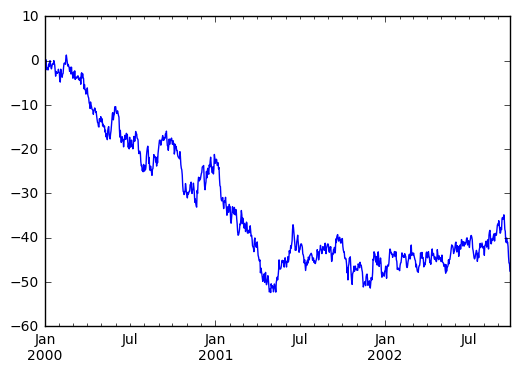

In [82]:
plt.show()

In [83]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=['A', 'B', 'C', 'D'])

In [84]:
df = df.cumsum()

In [85]:
plt.figure()

In [86]:
df.plot()

In [87]:
plt.legend(loc='best')

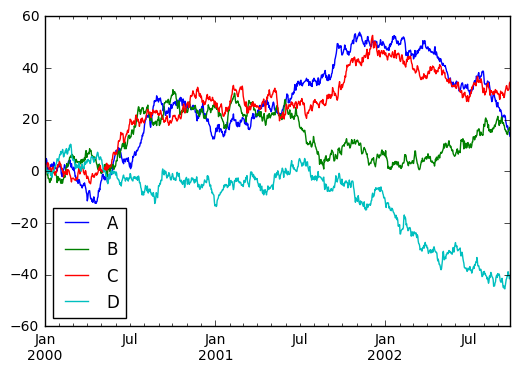

In [88]:
plt.show()

### 1.1.12 데이터 입출력

In [110]:
df.to_csv('foo.csv')

In [111]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.302195,-0.514921,0.327336,1.163006
1,2000-01-02,2.004380,0.612925,0.683130,2.441294
2,2000-01-03,2.572371,1.466030,1.412089,2.195104
3,2000-01-04,4.905567,1.114307,2.243142,0.202091
4,2000-01-05,4.143720,0.800782,1.578446,0.035474
5,2000-01-06,1.917376,-1.492282,3.129891,0.226390
6,2000-01-07,0.708618,-1.234929,3.362785,0.416949
7,2000-01-08,0.406252,-2.778541,3.102431,-0.834155
8,2000-01-09,0.205522,-2.777017,2.633626,0.201853
9,2000-01-10,1.335021,-3.057542,0.798658,-0.144341


In [112]:
df.to_json('foo.json')

In [113]:
pd.read_json('foo.json')

,A,B,C,D
2001-09-10,39.635868,7.572445,32.382028,-7.625829
2001-09-11,41.284026,7.337449,31.369196,-6.616254
2001-09-12,39.925758,5.794613,30.950949,-6.142507
2001-09-13,40.783529,3.984707,30.853329,-5.748292
2001-09-14,41.006780,4.019030,29.340309,-6.330789
2001-09-15,43.221571,4.450230,29.742975,-4.902405
2001-09-16,43.890971,6.494206,30.169682,-4.011299
2001-09-17,44.831045,6.177750,29.378227,-1.752796
2001-09-18,45.745627,5.819841,29.070339,-3.005581
2001-09-19,47.252017,5.218595,28.003477,-3.897944


In [114]:
df.to_hdf('foo.h5', 'df')

In [115]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,1.302195,-0.514921,0.327336,1.163006
2000-01-02,2.004380,0.612925,0.683130,2.441294
2000-01-03,2.572371,1.466030,1.412089,2.195104
2000-01-04,4.905567,1.114307,2.243142,0.202091
2000-01-05,4.143720,0.800782,1.578446,0.035474
2000-01-06,1.917376,-1.492282,3.129891,0.226390
2000-01-07,0.708618,-1.234929,3.362785,0.416949
2000-01-08,0.406252,-2.778541,3.102431,-0.834155
2000-01-09,0.205522,-2.777017,2.633626,0.201853
2000-01-10,1.335021,-3.057542,0.798658,-0.144341


In [116]:
df.to_pickle('foo.pic')

In [117]:
pd.read_pickle('foo.pic')

,A,B,C,D
2000-01-01,1.302195,-0.514921,0.327336,1.163006
2000-01-02,2.004380,0.612925,0.683130,2.441294
2000-01-03,2.572371,1.466030,1.412089,2.195104
2000-01-04,4.905567,1.114307,2.243142,0.202091
2000-01-05,4.143720,0.800782,1.578446,0.035474
2000-01-06,1.917376,-1.492282,3.129891,0.226390
2000-01-07,0.708618,-1.234929,3.362785,0.416949
2000-01-08,0.406252,-2.778541,3.102431,-0.834155
2000-01-09,0.205522,-2.777017,2.633626,0.201853
2000-01-10,1.335021,-3.057542,0.798658,-0.144341


In [119]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [120]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,1.302195,-0.514921,0.327336,1.163006
2000-01-02,2.004380,0.612925,0.683130,2.441294
2000-01-03,2.572371,1.466030,1.412089,2.195104
2000-01-04,4.905567,1.114307,2.243142,0.202091
2000-01-05,4.143720,0.800782,1.578446,0.035474
2000-01-06,1.917376,-1.492282,3.129891,0.226390
2000-01-07,0.708618,-1.234929,3.362785,0.416949
2000-01-08,0.406252,-2.778541,3.102431,-0.834155
2000-01-09,0.205522,-2.777017,2.633626,0.201853
2000-01-10,1.335021,-3.057542,0.798658,-0.144341


#### 용량비교 : 

In [121]:
!dir foo*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 5F72-5400

 c:\github\Study_py 디렉터리

2017-03-28  오전 12:13            86,917 foo.csv
2017-03-28  오전 12:14            47,384 foo.h5
2017-03-28  오전 12:14           116,657 foo.json
2017-03-28  오전 12:14            40,925 foo.pic
2017-03-28  오전 12:15            67,505 foo.xlsx
               5개 파일             359,388 바이트
               0개 디렉터리  180,184,879,104 바이트 남음


### Gotchas

In [129]:
if pd.Series([False, True, False]) is not None:
    print("I was not None")

I was not None


In [130]:
if pd.Series([False, True, False]).any():
    print("I am any")

I am any


In [133]:
pd.Series([True]).bool()

True

In [134]:
pd.Series([False]).bool()

False

In [139]:
pd.DataFrame([[True]]).bool()

True

In [138]:
pd.DataFrame([[False]]).bool()

False

## 1.2 전체 API 목록

http://pandas.pydata.org/pandas-docs/stable/api.html

## 주식 데이터 표현 예제

In [1]:
import pandas as pd
import pandas_datareader.data
import requests
import datetime
import matplotlib.pyplot as plt

CODE='005930.KS'
df = pandas_datareader.data.DataReader(CODE, "yahoo", '2017-01-01', datetime.datetime.now())

df['MA_5'] = df['Adj Close'].rolling(window=5, center=False).mean()
df['MA_20'] = df['Adj Close'].rolling(window=20, center=False).mean()
df['diff'] = df['MA_5'] - df['MA_20']

In [2]:
fig = plt.gcf()
fig.set_size_inches(16,8)

#price(가격)
price_chart = plt.subplot2grid((4,1),(0,0),rowspan=2)
price_chart.plot(df.index, df['Adj Close'], label = 'Adj Close')
price_chart.plot(df.index, df['MA_5'], label = 'MA_5')
price_chart.plot(df.index, df['MA_20'], label = 'MA_20')

plt.title("Samsung 2017")
plt.legend(loc='best')

vol_chart = plt.subplot2grid((4,1),(2,0), rowspan = 1)
vol_chart.bar(df.index, df['Volume'], color = 'c')

signal_chart = plt.subplot2grid((4,1), (3,0), rowspan=1)
signal_chart.plot(df.index, df['diff'].fillna(0), color = 'g')
plt.axhline(y=0, linestyle = '--', color = 'k')

prev_key = prev_val = 0
for key, val in df['diff'][1:].iteritems():
    if val == 0:
        continue
    elif val * prev_val < 0 and val > prev_val:
        print('GOLD', key, val)
        price_chart.annotate('Golden', xy = (key, df['MA_20'][key]), xytext=(10,-30), 
                             textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))        
        signal_chart.annotate('BUY', xy = (key, df['diff'][key]), xytext=(10,-30),
                              textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))        
    elif val * prev_val < 0 and val < prev_val:
        print('DEAD', key, val)
        price_chart.annotate('Dead', xy = (key, df['MA_20'][key]), xytext=(10,30),
                             textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
        signal_chart.annotate('Sell', xy = (key, df['diff'][key]), xytext=(10,30),
                             textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    prev_key, prev_val = key, val


DEAD 2017-02-13 00:00:00 -12600.0
GOLD 2017-02-24 00:00:00 7300.0
DEAD 2017-03-01 00:00:00 -3450.0
GOLD 2017-03-02 00:00:00 1050.0


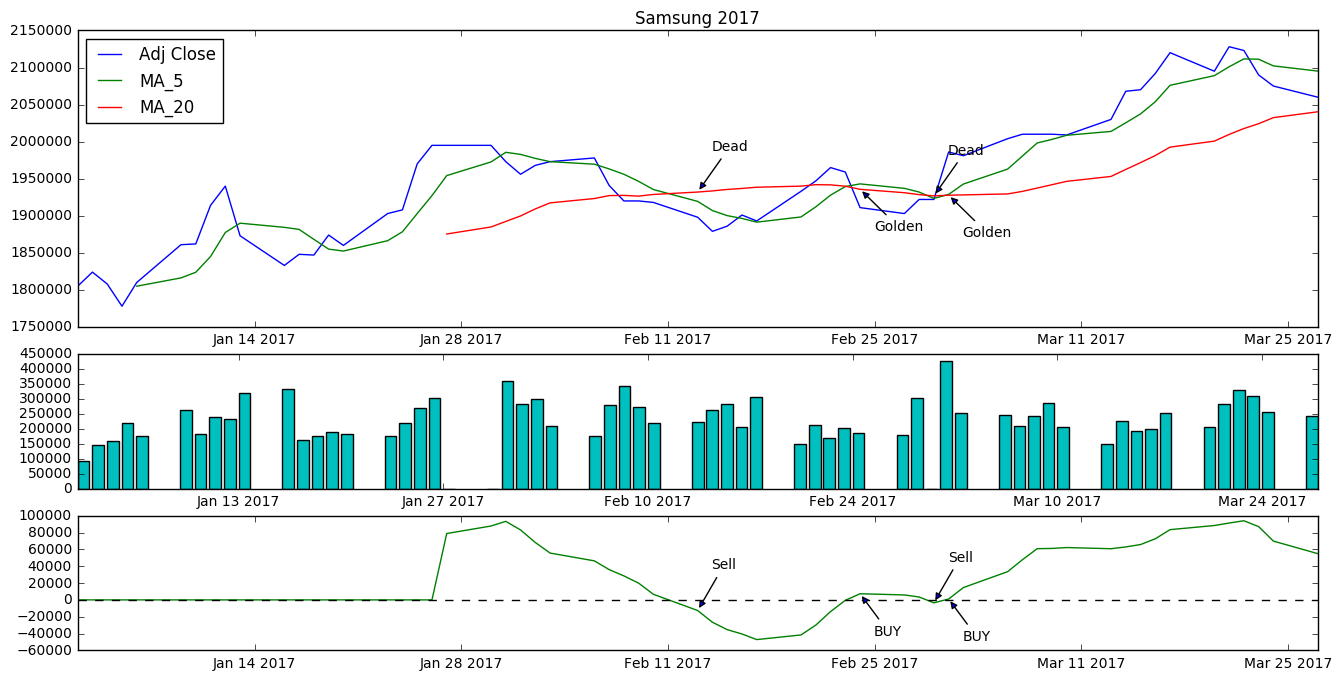

In [3]:
plt.show()

In [105]:
import pandas as pd
import pandas_datareader.data
import requests
import datetime
import matplotlib.pyplot as plt

CODE='005930.KS'
df = pandas_datareader.data.DataReader(CODE, "yahoo", '2017-01-01', datetime.datetime.now())

In [106]:
df.tail(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-17,2090000.0,2125000.0,2086000.0,2120000.0,252000,2120000.0
2017-03-20,2100000.0,2106000.0,2087000.0,2095000.0,205000,2095000.0
2017-03-21,2089000.0,2134000.0,2088000.0,2128000.0,284400,2128000.0


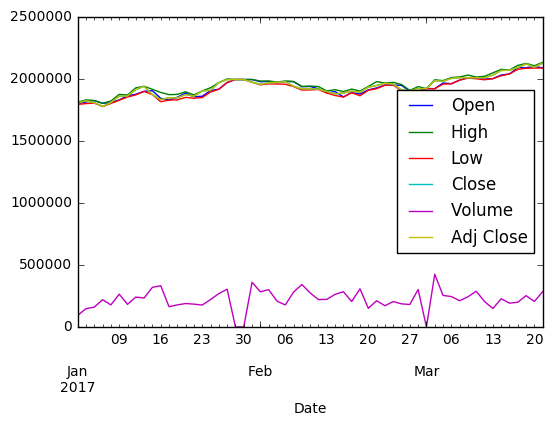

In [109]:
plt.show()